<a href="https://colab.research.google.com/github/tanisaur/forumla1-mini-sprint/blob/Nabil/NH_formula1_mini_sprint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Create a shared drive to mount data

In [1]:
!git clone https://github.com/tanisaur/forumla1-mini-sprint.git


Cloning into 'forumla1-mini-sprint'...
remote: Enumerating objects: 139, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 139 (delta 32), reused 3 (delta 3), pack-reused 86
Receiving objects: 100% (139/139), 7.69 MiB | 14.35 MiB/s, done.
Resolving deltas: 100% (62/62), done.


#**Team 19:**


##*Scenario:*
We are a data consulting firm that has been hired by the worst performing constructor to help them hire a new team of drivers and improve their performance standings

##*Hypothesis:*
By analyzing the historical performance data of Formula 1 teams, we can identify key factors that contribute to good performance and recommend specific strategies for the worst-performing team to improve their race results.

Factors such as pit stop, qaulify times, grid position

##*Initial Data Exploration:*

- Heatmap to show correlation

- Aggregating pit stop times

- Ranking of Teams with quickest pit stops

- Ranking of Teams lowest grid position






# **Import libraries**

In [2]:
pip install fastf1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 42.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import fastf1 as ff1
%matplotlib inline

# Read in Data

**Read in data**

In [4]:
driver_standings = pd.read_csv('//content/forumla1-mini-sprint/data/driver_standings.csv')
drivers = pd.read_csv('/content/forumla1-mini-sprint/data/drivers.csv')
results = pd.read_csv('/content/forumla1-mini-sprint/data/results.csv')
constructors = pd.read_csv('/content/forumla1-mini-sprint/data/constructors.csv')
constructor_results = pd.read_csv('/content/forumla1-mini-sprint/data/constructor_results.csv')
constructor_standings = pd.read_csv('/content/forumla1-mini-sprint/data/constructor_standings.csv')
races = pd.read_csv('/content/forumla1-mini-sprint/data/races.csv')
pit_stops = pd.read_csv('/content/forumla1-mini-sprint/data/pit_stops.csv')
qualifying = pd.read_csv('/content/forumla1-mini-sprint/data/qualifying.csv')


# Explore Data

In [6]:
constructors = constructors[['constructorId','name']]

print(constructors.describe(include ='all'))
constructors

        constructorId     name
count      211.000000      211
unique            NaN      211
top               NaN  McLaren
freq              NaN        1
mean       107.037915      NaN
std         61.653629      NaN
min          1.000000      NaN
25%         54.500000      NaN
50%        107.000000      NaN
75%        159.500000      NaN
max        214.000000      NaN


,constructorId,name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso
...,...,...
206,209,Manor Marussia
207,210,Haas F1 Team
208,211,Racing Point
209,213,AlphaTauri


In [7]:
constructor_standings

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0
...,...,...,...,...,...,...,...
13046,28568,1110,214,57.0,6,6,0
13047,28569,1110,3,11.0,7,7,0
13048,28570,1110,213,3.0,10,10,0
13049,28571,1110,210,11.0,8,8,0


In [8]:
constructor_standings = constructor_standings[['constructorStandingsId','raceId', 'constructorId','points', 'wins']]

cs_merged = pd.merge(constructors,constructor_standings, on= ['constructorId'])

#merge constructor standings and constructor names
cs_merged

,constructorId,name,constructorStandingsId,raceId,points,wins
0,1,McLaren,1,18,14.0,1
1,1,McLaren,7,19,24.0,1
2,1,McLaren,18,20,28.0,1
3,1,McLaren,29,21,34.0,1
4,1,McLaren,40,22,42.0,1
...,...,...,...,...,...,...
13046,214,Alpine F1 Team,28518,1106,44.0,0
13047,214,Alpine F1 Team,28538,1107,47.0,0
13048,214,Alpine F1 Team,28548,1108,47.0,0
13049,214,Alpine F1 Team,28558,1109,47.0,0


In [9]:
cs_merged.describe(include = 'all')

,constructorId,name,constructorStandingsId,raceId,points,wins
count,13051.000000,13051,13051.000000,13051.000000,13051.000000,13051.000000
unique,NaN,159,NaN,NaN,NaN,NaN
top,NaN,Ferrari,NaN,NaN,NaN,NaN
freq,NaN,1024,NaN,NaN,NaN,NaN
mean,48.470232,NaN,16674.407785,519.974638,34.139108,0.679182
std,59.857491,NaN,8773.183393,296.269063,77.227726,1.823594
min,1.000000,NaN,1.000000,1.000000,0.000000,0.000000
25%,6.000000,NaN,8798.500000,296.000000,0.000000,0.000000
50%,25.000000,NaN,20348.000000,497.000000,7.000000,0.000000
75%,57.000000,NaN,24674.500000,721.000000,31.000000,0.000000


In [10]:
#aggregate points and wins across all races
team_performance = cs_merged.groupby(['constructorId', 'name']).agg({
    'points': 'sum',
    'wins': 'sum',
}).reset_index()

#Sort values by highest points
top_teams = team_performance.sort_values(by=['points'], ascending=False)

#top 10 teams of all time
top_10_teams_oat = top_teams.head(10)

top_10_teams_oat

,constructorId,name,points,wins
5,6,Ferrari,91389.0,1923
109,131,Mercedes,73379.5,1207
8,9,Red Bull,68243.5,976
0,1,McLaren,57557.5,1604
2,3,Williams,32147.5,934
3,4,Renault,17168.0,352
9,10,Force India,10347.0,0
31,32,Team Lotus,7742.0,374
153,208,Lotus F1,7485.0,22
21,22,Benetton,7349.5,220


In [11]:
#print the count of unique values of each collumn in the data frame
print(f"Unique count\n{team_performance.nunique()}")

#print how many duplicates in the merged dataframe
print(f'Duplicates: {team_performance.duplicated().sum()}')

Unique count
constructorId    159
name             159
points            85
wins              34
dtype: int64
Duplicates: 0


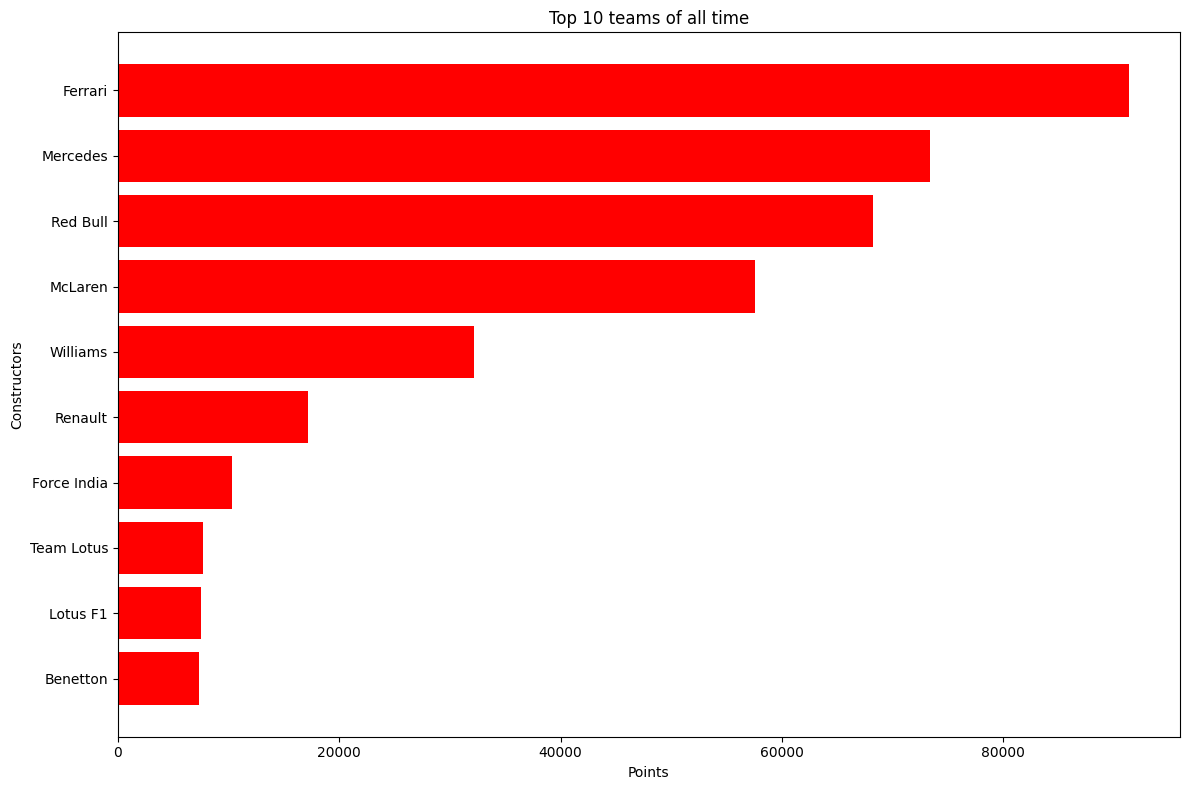

In [12]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_teams_oat['name'], top_10_teams_oat['points'], color='red')
plt.xlabel('Points')
plt.ylabel('Constructors')
plt.title('Top 10 teams of all time')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [13]:

driver_standings = driver_standings[['driverStandingsId', 'raceId', 'driverId', 'points', 'wins']]
drivers = drivers[['driverId', 'driverRef']]
ds_merged = pd.merge(driver_standings,drivers, on='driverId', how='left')

#Drivers name and their standings merged data frame
ds_merged

,driverStandingsId,raceId,driverId,points,wins,driverRef
0,1,18,1,10.0,1,hamilton
1,2,18,2,8.0,0,heidfeld
2,3,18,3,6.0,0,rosberg
3,4,18,4,5.0,0,alonso
4,5,18,5,4.0,0,kovalainen
...,...,...,...,...,...,...
34119,72183,1110,846,69.0,0,norris
34120,72184,1110,839,35.0,0,ocon
34121,72185,1110,844,99.0,0,leclerc
34122,72186,1110,857,34.0,0,piastri


In [14]:
print(f"Unique Count:\n{ds_merged.nunique()}")
print(f"Duplicates: {ds_merged.duplicated().sum()}")


Unique Count:
driverStandingsId    34124
raceId                1091
driverId               850
points                 418
wins                    16
driverRef              850
dtype: int64
Duplicates: 0


In [15]:
driver_performance = ds_merged.groupby(['driverId', 'driverRef']).agg({
    'points': 'sum',
    'wins': 'sum',
}).reset_index()

top_drivers_oat = driver_performance.sort_values(by=['points'], ascending=False)

#top 10 drives of all time
top_10_drivers_oat = top_drivers_oat.head(10)

top_10_drivers_oat

,driverId,driverRef,points,wins
0,1,hamilton,46550.5,1019
19,20,vettel,32026.0,517
821,830,max_verstappen,22486.5,419
3,4,alonso,21692.0,346
813,822,bottas,19458.0,109
7,8,raikkonen,19069.0,187
2,3,rosberg,16910.0,269
28,30,michael_schumacher,14514.0,849
806,815,perez,13756.0,61
808,817,ricciardo,13626.0,93


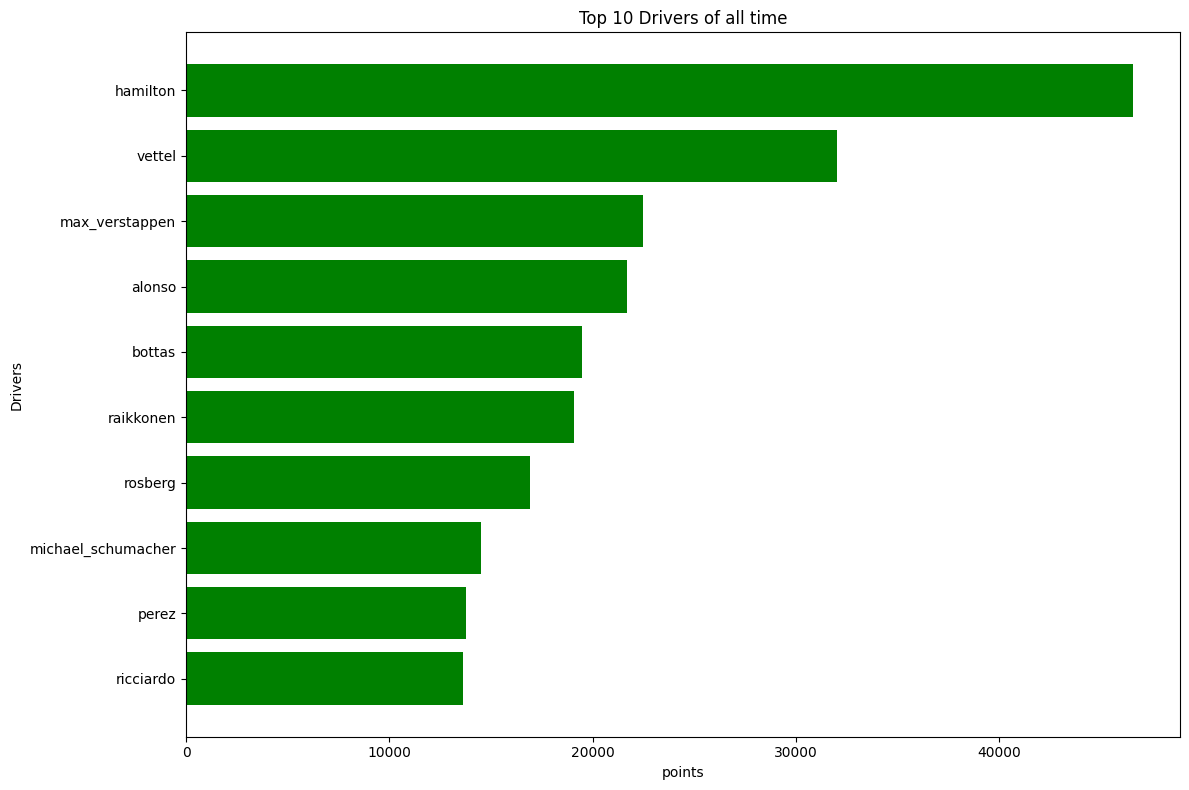

In [63]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_drivers_oat['driverRef'], top_10_drivers_oat['points'], color='green')
plt.xlabel('points')
plt.ylabel('Drivers')
plt.title('Top 10 Drivers of all time')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Checking the info of each included data, # of columns, # of rows

In [17]:
#only include
pit_stops = pit_stops[['raceId', 'driverId', 'stop', 'lap', 'duration', 'milliseconds']]

#merge pit stop times and drivers data frame
d_ps_merged = pd.merge(drivers, pit_stops, on=['driverId'])

d_ps_merged


,driverId,driverRef,raceId,stop,lap,duration,milliseconds
0,1,hamilton,841,1,16,23.227,23227
1,1,hamilton,841,2,36,23.199,23199
2,1,hamilton,842,1,12,22.552,22552
3,1,hamilton,842,2,24,22.611,22611
4,1,hamilton,842,3,37,25.382,25382
...,...,...,...,...,...,...,...
10084,858,sargeant,1109,1,13,24.001,24001
10085,858,sargeant,1109,2,34,22.197,22197
10086,858,sargeant,1110,1,8,23.570,23570
10087,858,sargeant,1110,2,24,23.938,23938


In [18]:
#summary statistics
print(d_ps_merged.describe(include='all'))
#basic info
print("\nBasic Info:\n")
print(d_ps_merged.info())

#info about unique data points
print("\nUnqiue Data Points:\n")
print(d_ps_merged.nunique())

#Missing values
print("\nMissing Values:\n")
print(d_ps_merged.isnull().sum())

#Check for duplicate values (Empty Frame means no duplicated rows)
duplicatedvals = d_ps_merged.duplicated().sum()
print(f"\nDuplicate Values: {duplicatedvals}\n")




            driverId driverRef        raceId          stop           lap  \
count   10089.000000     10089  10089.000000  10089.000000  10089.000000   
unique           NaN        72           NaN           NaN           NaN   
top              NaN  hamilton           NaN           NaN           NaN   
freq             NaN       493           NaN           NaN           NaN   
mean      523.998910       NaN    962.774011      1.759738     25.312023   
std       389.698555       NaN     81.144375      0.916282     14.729775   
min         1.000000       NaN    841.000000      1.000000      1.000000   
25%        18.000000       NaN    888.000000      1.000000     13.000000   
50%       815.000000       NaN    958.000000      2.000000     25.000000   
75%       831.000000       NaN   1035.000000      2.000000     36.000000   
max       858.000000       NaN   1110.000000      6.000000     78.000000   

       duration  milliseconds  
count     10089  1.008900e+04  
unique     6969        

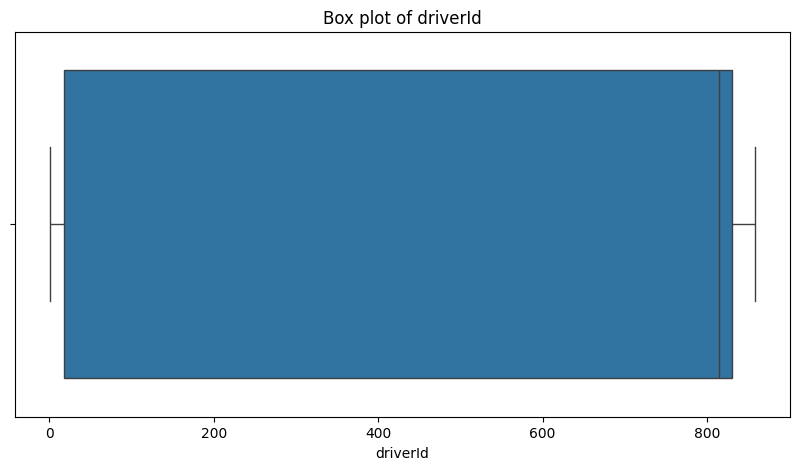

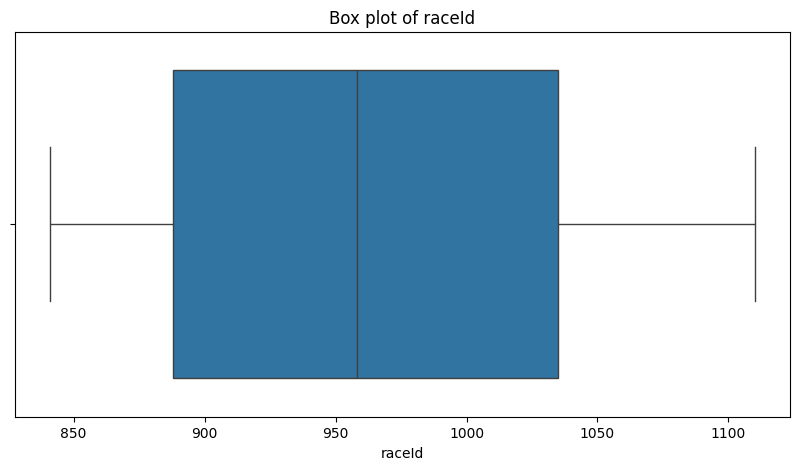

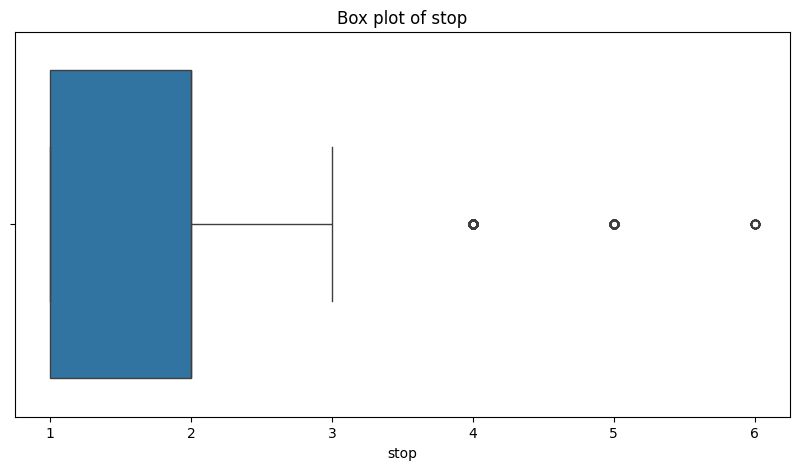

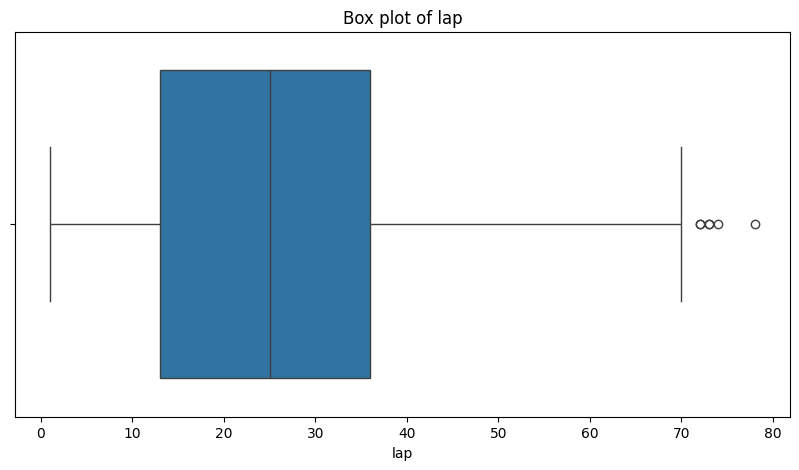

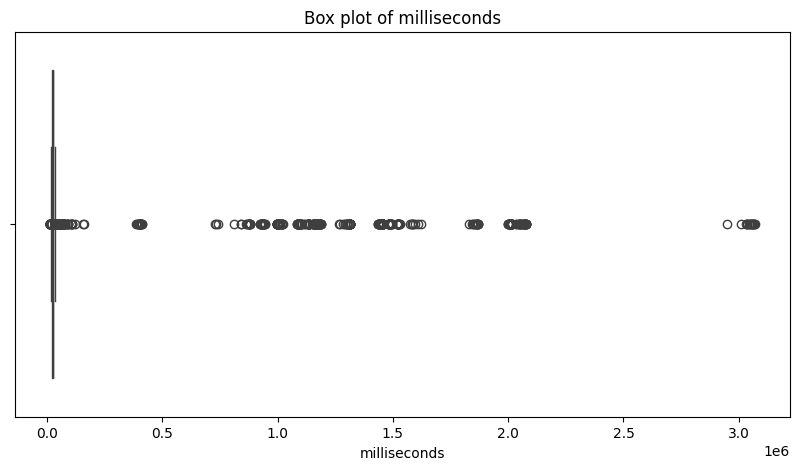

In [19]:
#check for outliers
num_columns = d_ps_merged.select_dtypes(include=['float64', 'int64']).columns

for col in num_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=d_ps_merged[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [20]:
#Calculating average pitstop times for each driver
average_pit_stops = d_ps_merged.groupby(['driverId', 'driverRef']).agg({
    'milliseconds': 'mean',
}).reset_index()

#rename to clear confusion
average_pit_stops.rename(columns={'milliseconds': 'pit_stops_ms'}, inplace=True)

#sort values by ascending pit stop times
drivers_shortest_pit_stops_sorted = average_pit_stops.sort_values(by=['pit_stops_ms'], ascending=True)

top_10_shortest_pit_stops_oat = drivers_shortest_pit_stops_sorted.head(10)

#Top 10 drivers with the shortest average pit stop times
top_10_shortest_pit_stops_oat




,driverId,driverRef,pit_stops_ms
16,30,michael_schumacher,22541.644444
1,2,heidfeld,22933.320000
11,17,webber,23556.549296
24,808,petrov,23694.160920
7,10,glock,23743.946667
20,153,alguersuari,23862.348837
25,811,bruno_senna,23938.557377
56,843,brendon_hartley,23993.911765
19,67,buemi,24024.317073
28,814,resta,24084.259843


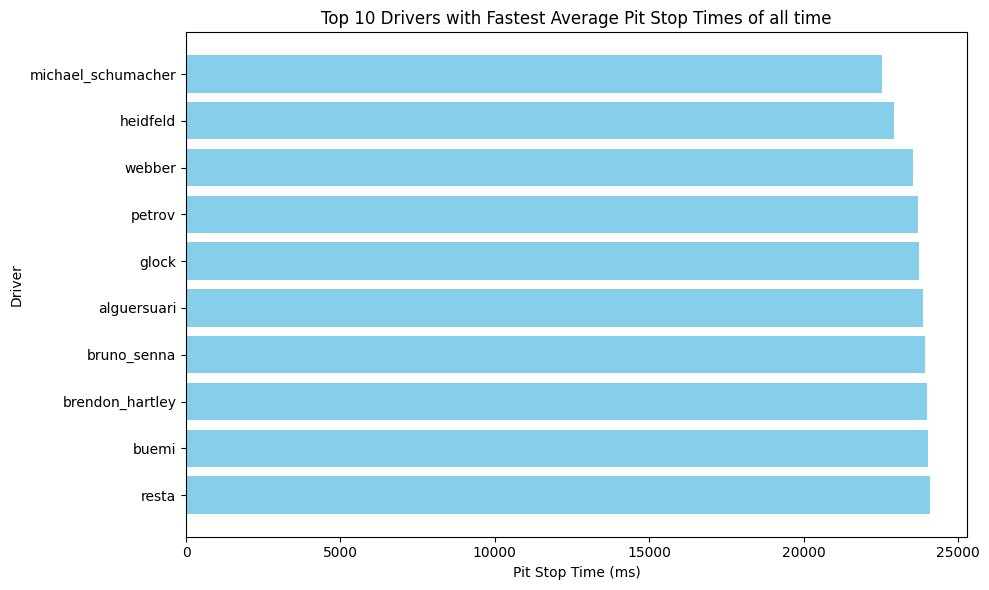

In [21]:

plt.figure(figsize=(10, 6))
plt.barh(top_10_shortest_pit_stops_oat['driverRef'], top_10_shortest_pit_stops_oat['pit_stops_ms'], color='skyblue')
plt.xlabel('Pit Stop Time (ms)')
plt.ylabel('Driver')
plt.title('Top 10 Drivers with Fastest Average Pit Stop Times of all time')
plt.gca().invert_yaxis()  # Invert y-axis to show the fastest times at the top
plt.tight_layout()
plt.show()

In [22]:
#summary statistics
print(driver_standings.describe(include='all'))

driver_standings = driver_standings[['driverStandingsId', 'raceId', 'driverId', 'points', 'wins']]

driver_standings

       driverStandingsId        raceId      driverId        points  \
count       34124.000000  34124.000000  34124.000000  34124.000000   
mean        42535.650656    572.649396    307.284697     13.489987   
std         21729.601277    284.154765    267.228677     35.599709   
min             1.000000      1.000000      1.000000      0.000000   
25%         19649.750000    347.000000     85.000000      0.000000   
50%         49674.500000    595.000000    221.000000      1.000000   
75%         58946.250000    797.000000    509.000000     10.000000   
max         72187.000000   1110.000000    858.000000    454.000000   

               wins  
count  34124.000000  
mean       0.269429  
std        0.995681  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max       15.000000  


,driverStandingsId,raceId,driverId,points,wins
0,1,18,1,10.0,1
1,2,18,2,8.0,0
2,3,18,3,6.0,0
3,4,18,4,5.0,0
4,5,18,5,4.0,0
...,...,...,...,...,...
34119,72183,1110,846,69.0,0
34120,72184,1110,839,35.0,0
34121,72185,1110,844,99.0,0
34122,72186,1110,857,34.0,0


In [23]:
#Merge data frames that include drivrs standings and their average pit stop times
ds_s_ps_oat_merged = pd.merge(driver_standings,top_10_shortest_pit_stops_oat,on =['driverId'])

#sort values by fastest average pit stop times at the top
ds_top_s_ps_oat_merged = ds_s_ps_oat_merged.sort_values(by =['pit_stops_ms'], ascending = True)

ds_top_s_ps_oat_merged

,driverStandingsId,raceId,driverId,points,wins,driverRef,pit_stops_ms
559,12732,105,30,136.0,12,michael_schumacher,22541.644444
610,11713,156,30,113.0,8,michael_schumacher,22541.644444
611,11738,157,30,123.0,9,michael_schumacher,22541.644444
612,3077,158,30,10.0,1,michael_schumacher,22541.644444
613,3086,159,30,20.0,2,michael_schumacher,22541.644444
...,...,...,...,...,...,...,...
1052,65081,866,814,21.0,0,resta,24084.259843
1051,65057,865,814,21.0,0,resta,24084.259843
1050,65033,864,814,15.0,0,resta,24084.259843
1060,65374,874,814,44.0,0,resta,24084.259843


In [24]:
dp_ps = ds_top_s_ps_oat_merged.groupby(['driverId', 'driverRef']).agg({
    'points': 'sum',
    'wins': 'sum',
    'pit_stops_ms': 'mean'
}).reset_index()

top_10_ds_ps_oat = dp_ps.sort_values(by = ['points','wins'], ascending = False)

top_10_ds_ps_oat

,driverId,driverRef,points,wins,pit_stops_ms
3,30,michael_schumacher,14514.0,849,22541.644444
2,17,webber,10608.0,86,23556.549296
0,2,heidfeld,2830.0,0,22933.320000
8,814,resta,1344.0,0,24084.259843
6,808,petrov,757.0,0,23694.160920
1,10,glock,445.0,0,23743.946667
7,811,bruno_senna,412.0,0,23938.557377
4,67,buemi,328.0,0,24024.317073
5,153,alguersuari,249.0,0,23862.348837
9,843,brendon_hartley,37.0,0,23993.911765


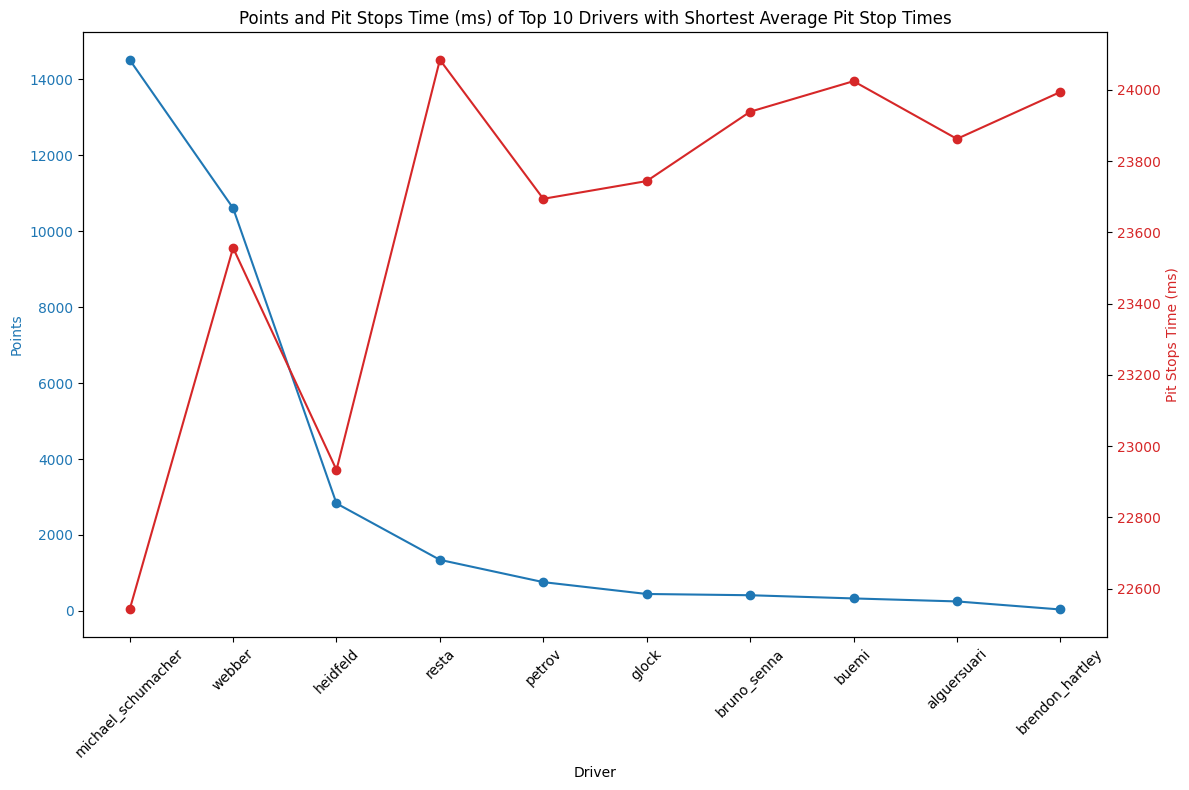

In [25]:
fig, ax1 = plt.subplots(figsize=(12, 8))

# Line graph for Points
color = 'tab:blue'
ax1.set_xlabel('Driver')
ax1.set_ylabel('Points', color=color)
ax1.plot(top_10_ds_ps_oat['driverRef'], top_10_ds_ps_oat['points'], marker='o', color=color, label='Points')
ax1.tick_params(axis='y', labelcolor=color)
ax1.tick_params(axis='x', rotation=45)

# Create a second y-axis for Pit Stops Time (ms)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Pit Stops Time (ms)', color=color)
ax2.plot(top_10_ds_ps_oat['driverRef'], top_10_ds_ps_oat['pit_stops_ms'], marker='o', color=color, label='Pit Stops Time (ms)')
ax2.tick_params(axis='y', labelcolor=color)

# Title and layout
plt.title('Points and Pit Stops Time (ms) of Top 10 Drivers with Shortest Average Pit Stop Times')
fig.tight_layout()
plt.show()

In [26]:
#find the top 10 drivers of all time's pit stop times

top_10_oat_ps = pd.merge(top_10_drivers_oat, d_ps_merged, on=['driverId', 'driverRef'], how='left')

top_10_oat_ps

,driverId,driverRef,points,wins,raceId,stop,lap,duration,milliseconds
0,1,hamilton,46550.5,1019,841,1,16,23.227,23227
1,1,hamilton,46550.5,1019,841,2,36,23.199,23199
2,1,hamilton,46550.5,1019,842,1,12,22.552,22552
3,1,hamilton,46550.5,1019,842,2,24,22.611,22611
4,1,hamilton,46550.5,1019,842,3,37,25.382,25382
...,...,...,...,...,...,...,...,...,...
3659,817,ricciardo,13626.0,93,1096,1,19,21.893,21893
3660,817,ricciardo,13626.0,93,1109,1,18,21.958,21958
3661,817,ricciardo,13626.0,93,1109,2,29,22.203,22203
3662,817,ricciardo,13626.0,93,1110,1,5,22.843,22843


In [27]:
print(f"Unique Count:\n{top_10_oat_ps.nunique()}")
print(f"Duplicates: {top_10_oat_ps.duplicated().sum()}")

Unique Count:
driverId          10
driverRef         10
points            10
wins              10
raceId           251
stop               6
lap               72
duration        3121
milliseconds    3121
dtype: int64
Duplicates: 0


In [28]:
#rename collumn to clear confusion
top_10_oat_ps.rename(columns={'milliseconds': 'pit_stops_ms'}, inplace=True)
top_10_oat_ps = top_10_oat_ps.groupby(['driverId', 'driverRef']).agg({
    'pit_stops_ms': 'mean'
}).reset_index()

#top 10 drivers
top_10_oat_ps = pd.merge(top_10_oat_ps, top_10_drivers_oat, on=['driverId', 'driverRef'], how ='left')
top_10_oat_ps



,driverId,driverRef,pit_stops_ms,points,wins
0,1,hamilton,85105.628803,46550.5,1019
1,3,rosberg,49760.690763,16910.0,269
2,4,alonso,82766.475369,21692.0,346
3,8,raikkonen,77797.626404,19069.0,187
4,20,vettel,78235.857451,32026.0,517
5,30,michael_schumacher,22541.644444,14514.0,849
6,815,perez,84199.324786,13756.0,61
7,817,ricciardo,88404.917051,13626.0,93
8,822,bottas,94694.787724,19458.0,109
9,830,max_verstappen,92048.554140,22486.5,419


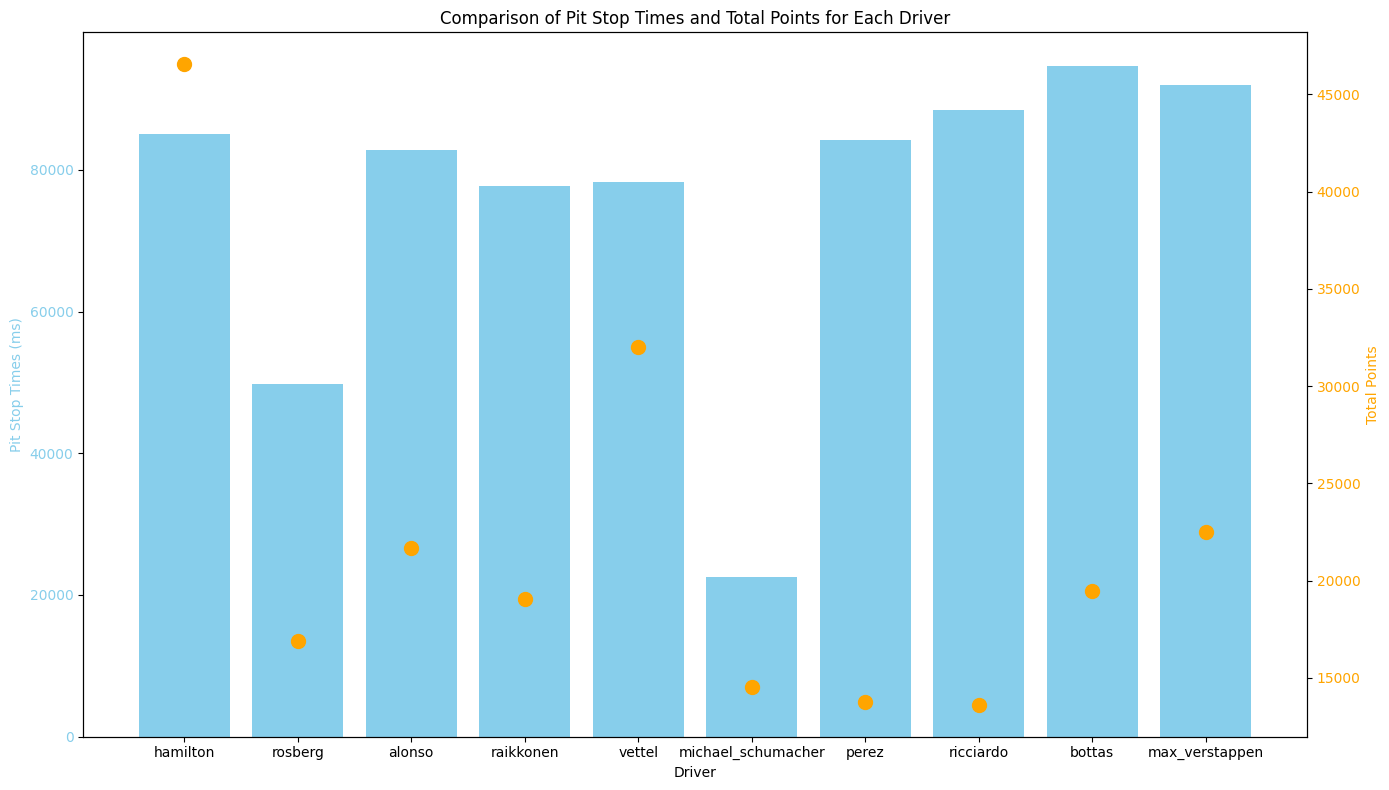

In [29]:
# Create figure and axis objects
fig, ax1 = plt.subplots(figsize=(14, 8))

# Bar chart for pit stop times
ax1.bar(top_10_oat_ps['driverRef'], top_10_oat_ps['pit_stops_ms'], color='skyblue', label='Pit Stop Times (ms)')
ax1.set_xlabel('Driver')
ax1.set_ylabel('Pit Stop Times (ms)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

# Create a second y-axis for the scatter plot
ax2 = ax1.twinx()
ax2.scatter(top_10_oat_ps['driverRef'], top_10_oat_ps['points'], color='orange', label='Total Points', s=100)
ax2.set_ylabel('Total Points', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Add title and legend
plt.title('Comparison of Pit Stop Times and Total Points for Each Driver')
fig.tight_layout()  # Adjust layout to make room for the second y-axis

# Show the plot
plt.show()

In [ ]:
#next compare this data set to the pit stop driver top data set and see how the drivers rank in terms of the best all time drivers, also see what teams the drivers in the pit stop top list are in and see how their performance is
#extract more recent data, look at 2023 and 2022 races for the top drivers with fastest average pit stop times, see how they compare in regards to ther ranks

In [59]:
#get the races from 2023 only
races_2023 = races[races['year'].isin([2023])]
races_2023 = races_2023[['raceId', 'year']]

races_2023

,raceId,year
1079,1098,2023
1080,1099,2023
1081,1100,2023
1082,1101,2023
1083,1102,2023
1084,1104,2023
1085,1105,2023
1086,1106,2023
1087,1107,2023
1088,1108,2023


In [48]:
ds_ps_merged = pd.merge(d_ps_merged, driver_standings, on = ['driverId', 'raceId'], how ='left')

#merge the drivers and pit_stop times with their respective races from 2023 only
ds_ps_2023 = pd.merge(ds_ps_merged, races_2023, on=['raceId'], how = 'left')


ds_ps_2023

,driverId,driverRef,raceId,stop,lap,duration,milliseconds,driverStandingsId,points,wins,year
0,1,hamilton,841,1,16,23.227,23227,64691.0,18.0,0.0,NaN
1,1,hamilton,841,2,36,23.199,23199,64691.0,18.0,0.0,NaN
2,1,hamilton,842,1,12,22.552,22552,64385.0,22.0,0.0,NaN
3,1,hamilton,842,2,24,22.611,22611,64385.0,22.0,0.0,NaN
4,1,hamilton,842,3,37,25.382,25382,64385.0,22.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
10084,858,sargeant,1109,1,13,24.001,24001,72157.0,0.0,0.0,2023.0
10085,858,sargeant,1109,2,34,22.197,22197,72157.0,0.0,0.0,2023.0
10086,858,sargeant,1110,1,8,23.570,23570,72178.0,0.0,0.0,2023.0
10087,858,sargeant,1110,2,24,23.938,23938,72178.0,0.0,0.0,2023.0


In [55]:
#drop the data entries that have null value for their year
ds_ps_2023 = ds_ps_2023.dropna(subset=['year'])

ds_ps_2023

,driverId,driverRef,raceId,stop,lap,duration,milliseconds,driverStandingsId,points,wins,year
470,1,hamilton,1098,1,12,24.682,24682,72010.0,10.0,0.0,2023.0
471,1,hamilton,1098,2,30,24.690,24690,72010.0,10.0,0.0,2023.0
472,1,hamilton,1099,1,18,21.102,21102,71890.0,20.0,0.0,2023.0
473,1,hamilton,1100,1,8,15:25.181,925181,71910.0,38.0,0.0,2023.0
474,1,hamilton,1100,2,55,14:31.670,871670,71910.0,38.0,0.0,2023.0
...,...,...,...,...,...,...,...,...,...,...,...
10084,858,sargeant,1109,1,13,24.001,24001,72157.0,0.0,0.0,2023.0
10085,858,sargeant,1109,2,34,22.197,22197,72157.0,0.0,0.0,2023.0
10086,858,sargeant,1110,1,8,23.570,23570,72178.0,0.0,0.0,2023.0
10087,858,sargeant,1110,2,24,23.938,23938,72178.0,0.0,0.0,2023.0


In [70]:
#aggregate the points of all drivers competing in races in 2023
drivers_2023_performance_points = ds_ps_2023.groupby(['driverId', 'driverRef']).agg({
    'points': 'sum',
    'milliseconds': 'mean'
}).reset_index()

top_drivers_2023_points = drivers_2023_performance_points.sort_values(by = 'points', ascending = False)


top_10_2023_drivers_points =  top_drivers_2023_points.head(10)
#displaying the top 10 drivers with the most amount of points for year 2023
top_10_2023_drivers_points

,driverId,driverRef,points,milliseconds
7,830,max_verstappen,3748.0,185385.590909
3,815,perez,2872.0,156272.925926
1,4,alonso,2054.0,186226.500000
0,1,hamilton,1923.0,179225.173913
8,832,sainz,1077.0,194990.857143
12,844,leclerc,1012.0,23463.315789
14,847,russell,984.0,74182.315789
10,840,stroll,666.0,193634.190476
13,846,norris,500.0,155081.071429
9,839,ocon,339.0,113584.500000


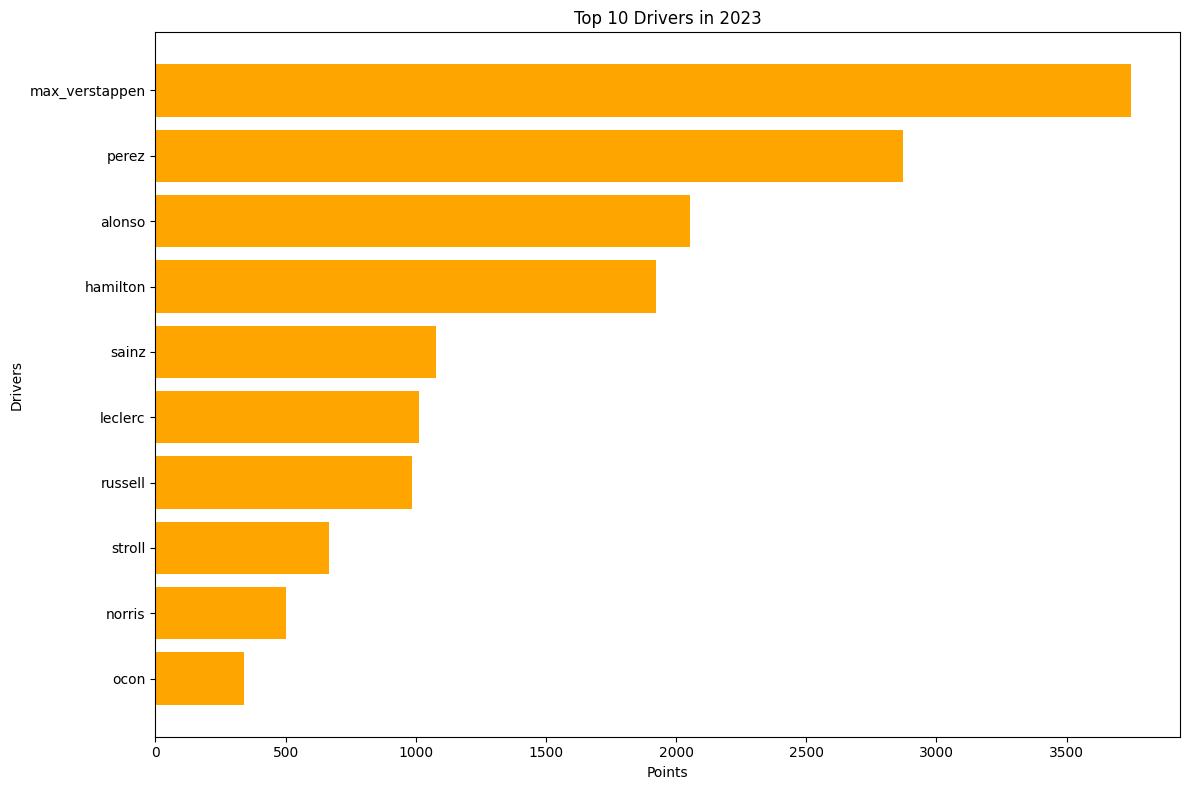

In [61]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_2023_drivers_points['driverRef'], top_10_2023_drivers_points['points'], color='orange')
plt.xlabel('Points')
plt.ylabel('Drivers')
plt.title('Top 10 Drivers in 2023')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

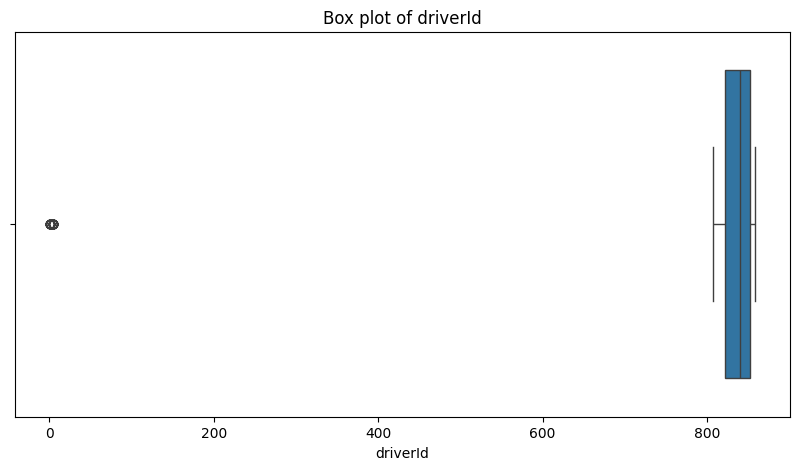

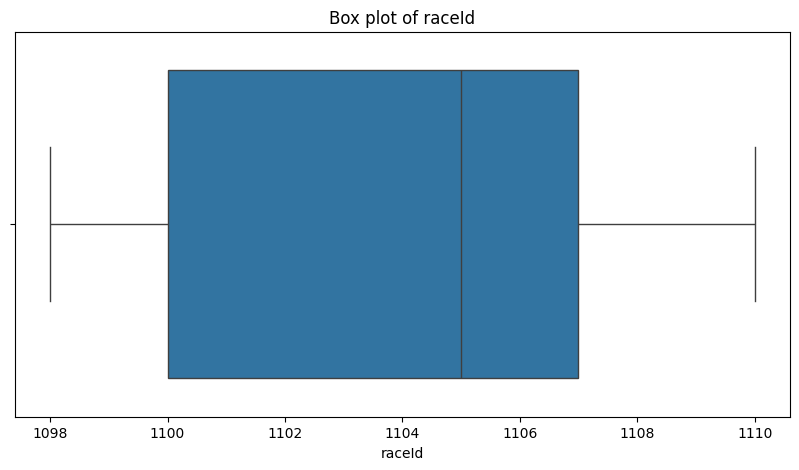

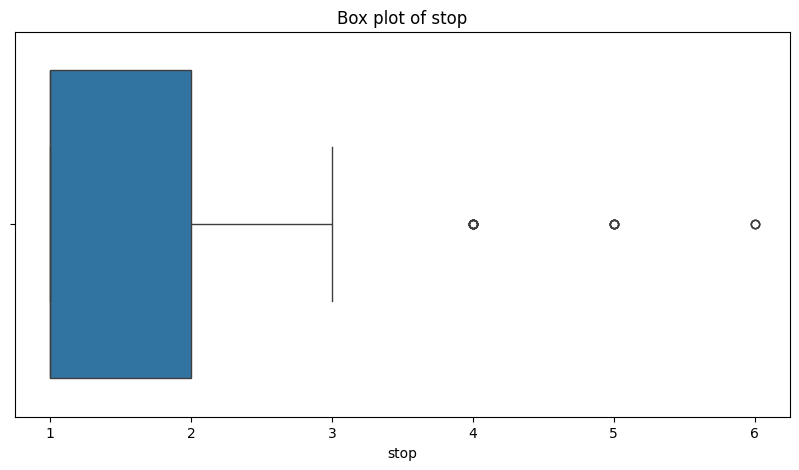

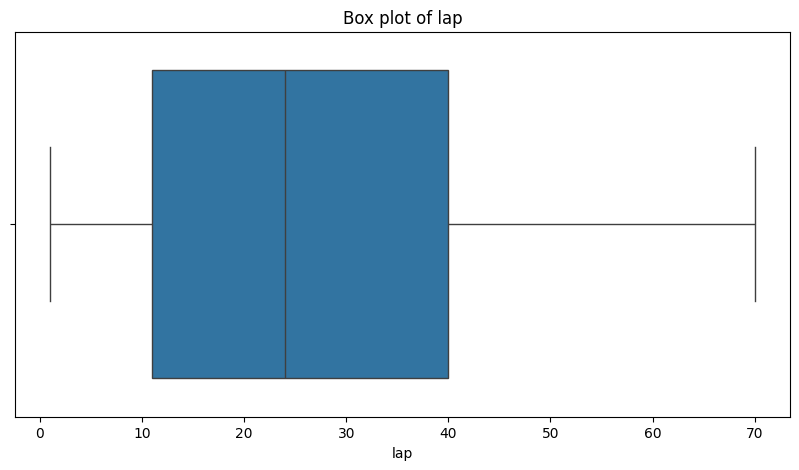

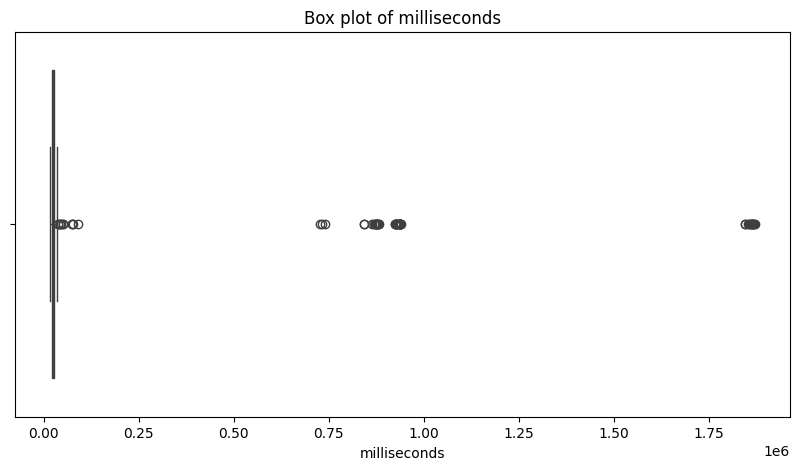

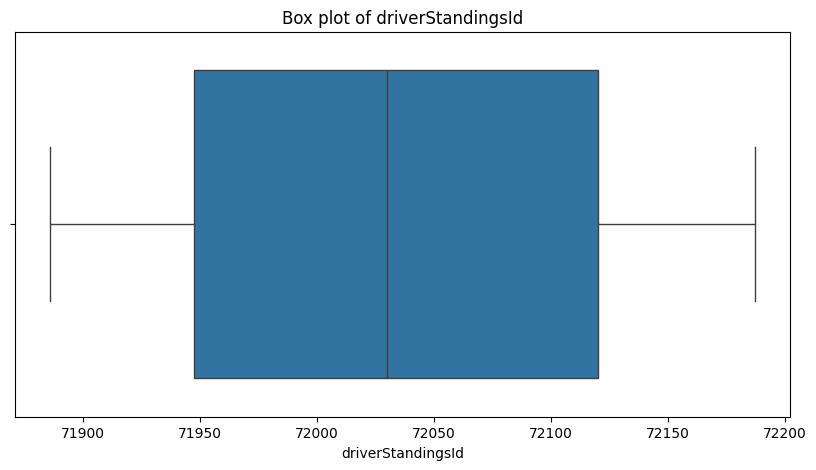

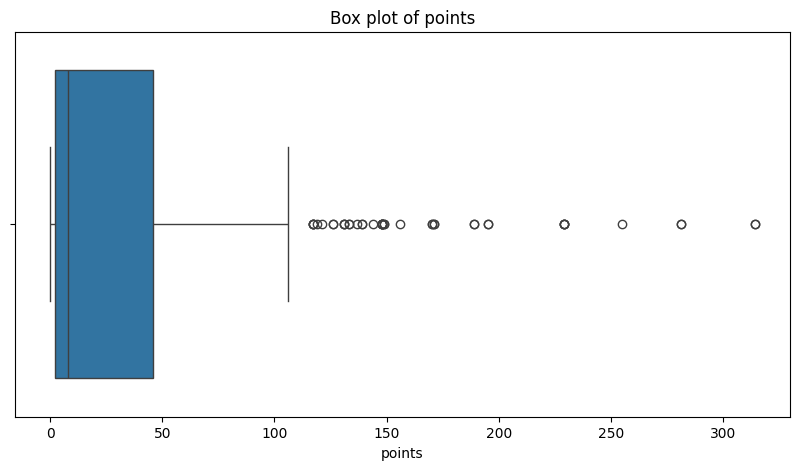

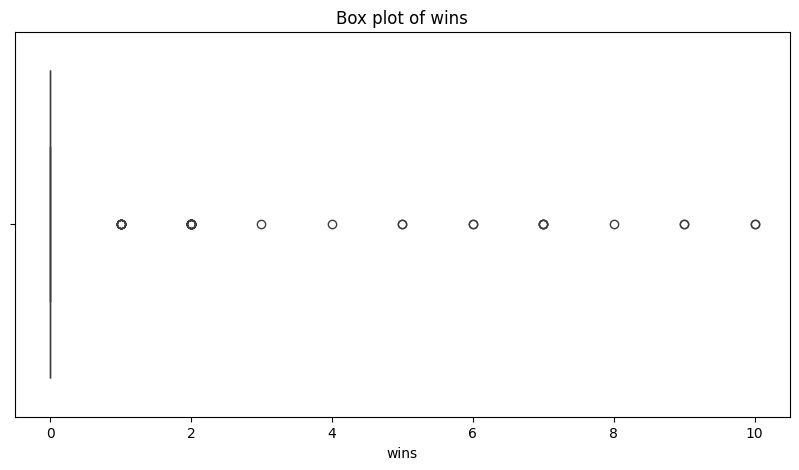

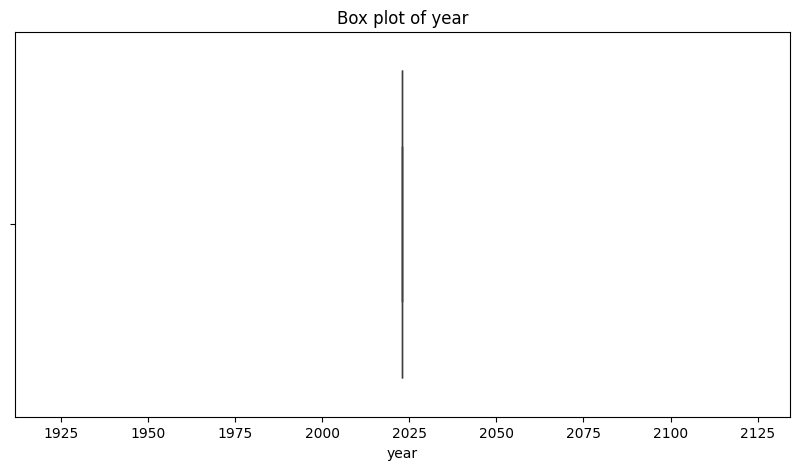

In [56]:
#Discover anly outliers in the data frame above
numerical_columns = ds_ps_2023.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=ds_ps_2023[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [65]:
drivers_2023_performance_ps = ds_ps_2023.groupby(['driverId', 'driverRef']).agg({
    'milliseconds': 'mean',
    'points': 'sum'
}).reset_index()

top_drivers_2023_ps = drivers_2023_performance_ps.sort_values(by = 'milliseconds', ascending = True)

top_10_2023_drivers_ps =  top_drivers_2023_ps.head(10)

top_10_2023_drivers_ps

,driverId,driverRef,milliseconds,points
4,817,ricciardo,22573.500000,0.0
12,844,leclerc,23463.315789,1012.0
15,848,albon,23706.000000,104.0
6,825,kevin_magnussen,68936.142857,32.0
14,847,russell,74182.315789,984.0
20,858,sargeant,88475.884615,0.0
11,842,gasly,111742.350000,208.0
9,839,ocon,113584.500000,339.0
18,856,de_vries,115816.888889,0.0
17,855,zhou,152159.535714,74.0


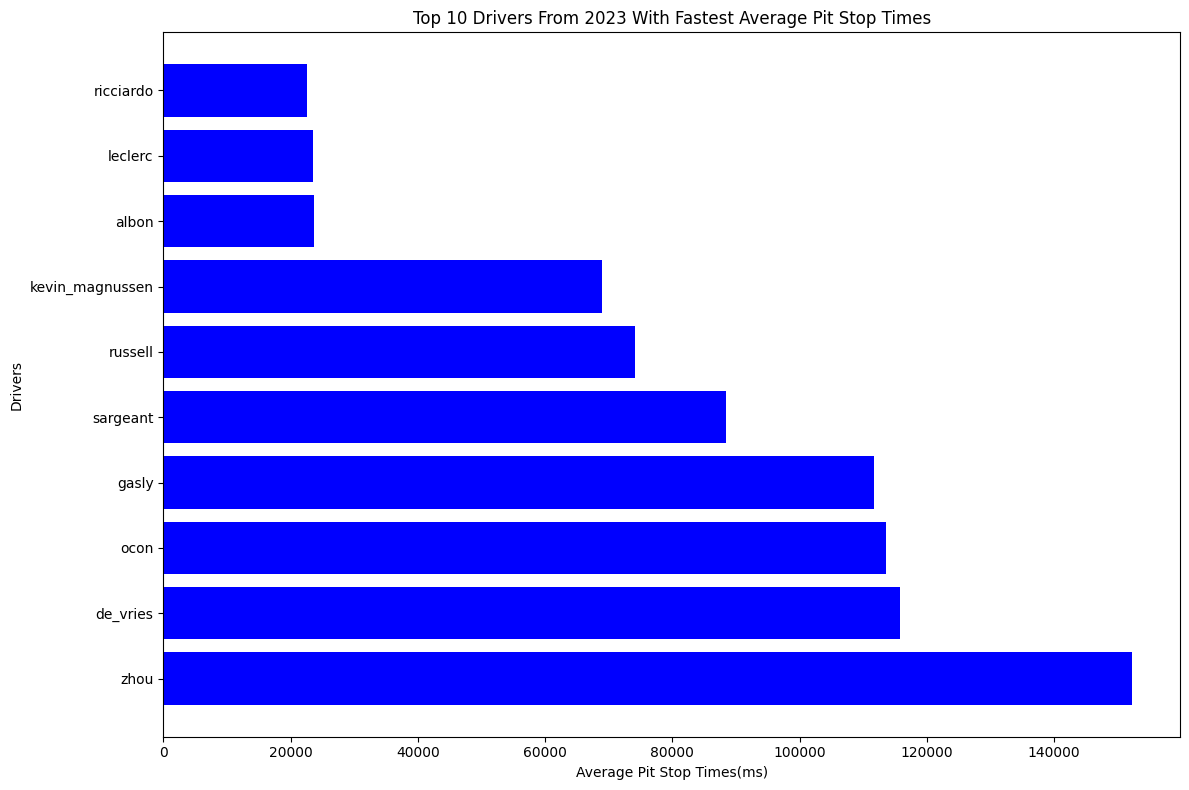

In [62]:
plt.figure(figsize=(12, 8))
plt.barh(top_10_2023_drivers_ps['driverRef'], top_10_2023_drivers_ps['milliseconds'], color='blue')
plt.xlabel('Average Pit Stop Times(ms)')
plt.ylabel('Drivers')
plt.title('Top 10 Drivers From 2023 With Fastest Average Pit Stop Times')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [74]:
results = results[['resultId', 'raceId', 'driverId', 'constructorId','grid', 'position', 'positionText', 'positionOrder', 'points', 'rank']]

results

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,rank
0,1,18,1,1,1,1,1,1,10.0,2
1,2,18,2,2,5,2,2,2,8.0,3
2,3,18,3,3,7,3,3,3,6.0,5
3,4,18,4,4,11,4,4,4,5.0,7
4,5,18,5,1,3,5,5,5,4.0,1
...,...,...,...,...,...,...,...,...,...,...
26075,26081,1110,817,213,19,16,16,16,0.0,15
26076,26082,1110,858,3,18,17,17,17,0.0,9
26077,26083,1110,807,210,0,18,18,18,0.0,4
26078,26084,1110,832,6,4,\N,R,19,0.0,19


In [89]:
cs_merged

df_merged = pd.merge(results, cs_merged[['constructorId','raceId', 'constructorStandingsId', 'name']], on=['constructorId', 'raceId'], how ='left')
df_merged = pd.merge(df_merged, ds_ps_merged[['driverId', 'raceId', 'milliseconds']], on = ['driverId', 'raceId'], how = 'left')

df_merged


,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,rank,constructorStandingsId,name,milliseconds
0,1,18,1,1,1,1,1,1,10.0,2,1.0,McLaren,NaN
1,2,18,2,2,5,2,2,2,8.0,3,2.0,BMW Sauber,NaN
2,3,18,3,3,7,3,3,3,6.0,5,3.0,Williams,NaN
3,4,18,4,4,11,4,4,4,5.0,7,4.0,Renault,NaN
4,5,18,5,1,3,5,5,5,4.0,1,1.0,McLaren,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31233,26082,1110,858,3,18,17,17,17,0.0,9,28569.0,Williams,23109.0
31234,26083,1110,807,210,0,18,18,18,0.0,4,28571.0,Haas F1 Team,24571.0
31235,26083,1110,807,210,0,18,18,18,0.0,4,28571.0,Haas F1 Team,25238.0
31236,26084,1110,832,6,4,\N,R,19,0.0,19,28565.0,Ferrari,23303.0


In [88]:
print(f"null values:\n{df_merged.isnull().sum()}")

null values:
resultId                      0
raceId                        0
driverId                      0
constructorId                 0
grid                          0
position                      0
positionText                  0
positionOrder                 0
points                        0
rank                          0
constructorStandingsId     1868
name                       1868
milliseconds              21149
dtype: int64


In [94]:
#dropping rows that have milliesecond entry (cleaning data)
df_merged = df_merged.dropna()
df_merged

,resultId,raceId,driverId,constructorId,grid,position,positionText,positionOrder,points,rank,constructorStandingsId,name,milliseconds
20776,20779,841,20,9,1,1,1,1,25.0,4,24660.0,Red Bull,22603.0
20777,20779,841,20,9,1,1,1,1,25.0,4,24660.0,Red Bull,24036.0
20778,20780,841,1,1,2,2,2,2,18.0,8,24661.0,McLaren,23227.0
20779,20780,841,1,1,2,2,2,2,18.0,8,24661.0,McLaren,23199.0
20780,20781,841,808,4,6,3,3,3,15.0,7,24662.0,Renault,24535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31232,26082,1110,858,3,18,17,17,17,0.0,9,28569.0,Williams,23938.0
31233,26082,1110,858,3,18,17,17,17,0.0,9,28569.0,Williams,23109.0
31234,26083,1110,807,210,0,18,18,18,0.0,4,28571.0,Haas F1 Team,24571.0
31235,26083,1110,807,210,0,18,18,18,0.0,4,28571.0,Haas F1 Team,25238.0


In [101]:
team_performance_ps = df_merged.groupby(['constructorId', 'name']).agg({
    'milliseconds': 'mean',
    'points': 'sum'
}).reset_index()

top_teams_oat_ps = team_performance_ps.sort_values(by = ['milliseconds'], ascending = True)
top_10_teams_oat_ps = top_teams_oat_ps.head(10)

#top 10 teams of all time with the fastest average pit stop times
top_10_teams_oat_ps

,constructorId,name,milliseconds,points
12,166,Virgin,24236.194805,0.0
13,205,Lotus,24444.211765,0.0
16,208,Lotus F1,32463.750877,1483.0
11,164,HRT,32677.766667,0.0
15,207,Caterham,33924.618257,0.0
14,206,Marussia,34396.836910,2.0
3,5,Toro Rosso,44486.983895,983.0
7,15,Sauber,44646.760518,558.0
6,10,Force India,50845.770115,1876.0
2,4,Renault,63261.833747,884.0


# Clean Data

Identify null values, find duplicates, find any outliers

# Analyze